### IDs:
Insert yours IDs to the cell below

ID #1:310116165

ID #2:308564293


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?

In [1]:
#preparation
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn import mixture

#sns styling
sns.set_style("whitegrid")


#load Boston Dataset
warnings.filterwarnings('ignore') #ignore the loading warning
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame (data=boston_data.data, columns = boston_data.feature_names)
df['Price'] = boston_data.target

#initial analytics
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


We can see that the dataset a total of 14 features which includes one target feature - the price. All the features are numeric of type float64. There are 506 samples (rows) with no apparent missing values.

2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.

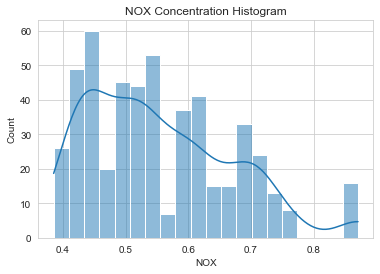

In [2]:
sns.histplot(data = df, x = "NOX", bins = 20, kde = True, log_scale = False).set(title='NOX Concentration Histogram');

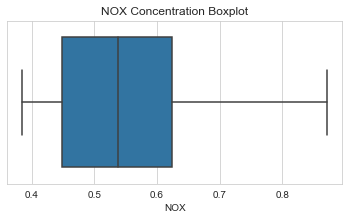

In [3]:
plt.figure(figsize= (6, 3))
sns.boxplot(data = df, x = "NOX").set(title='NOX Concentration Boxplot');

This distribution resembles the most a log-normal distribution, as it is positive skewed with a long right tail and all values are positive. But it is difficult to say with confidence without having the right and left tails, since the data is cut off at 0.3 and 1.

3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with 
unusual behaviour?


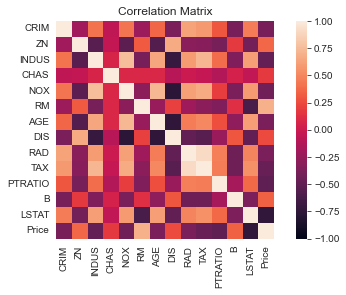

In [4]:
plt.figure(figsize=(8, 4))
boston_corr = df.corr()
sns.heatmap(boston_corr, vmin=-1, vmax=1, square = True).set(title="Correlation Matrix");

We can see that TAX and RAD have a high positive correlation of close to 1.
DIS has a high negative correlation with INDUS, NOX and AGE.

The "CHAS" (Charles River dummy variable) has a peculiar behaviour with a near constant correlation coefficient. This is a categorical variable and therefore does not correlate to the other variables.

4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 


In [5]:
#lets find the min and max correlation
min_row = boston_corr.min().idxmin()
min_col = boston_corr[min_row].idxmin()
print('The minimum correlation is:' ,boston_corr[min_row][min_col] , 'and the variables are:', min_row, min_col)

#lets find the min and max correlation
idx_no_1 = boston_corr < 1
max_row = boston_corr[idx_no_1].max().idxmax()
max_col = boston_corr[idx_no_1][max_row].idxmax()
print('The maximum correlation is:' ,boston_corr[max_row][max_col] , 'and the variables are:', max_row, max_col)

The minimum correlation is: -0.7692301132258282 and the variables are: NOX DIS
The maximum correlation is: 0.9102281885331865 and the variables are: RAD TAX


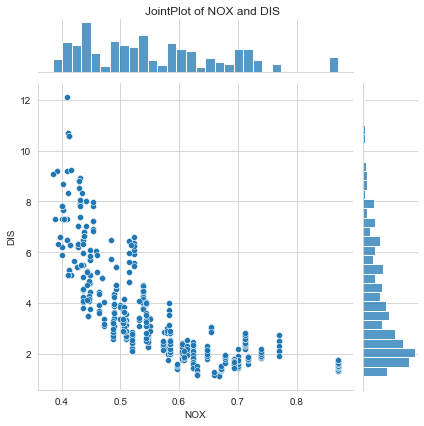

In [6]:
p = sns.jointplot(data = df, x = 'NOX', y = 'DIS', marginal_kws = dict(bins = 30));
p.fig.suptitle("JointPlot of NOX and DIS");
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

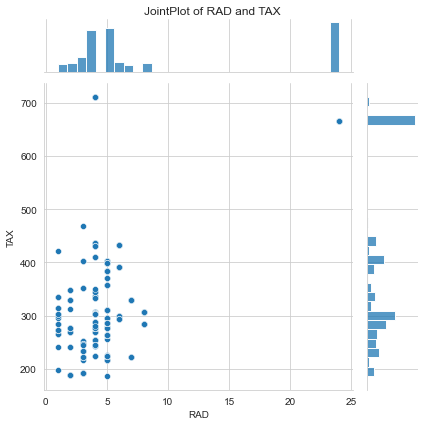

In [7]:
p = sns.jointplot(data = df, x = 'RAD', y = 'TAX', marginal_kws = dict(bins = 30));
p.fig.suptitle("JointPlot of RAD and TAX");
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count).

In a count histogram with N instances the horizonal lines will be at $\frac{N}{4}$ and $\frac{3N}{4}$. We added also vertical lines which represent the quantile values.

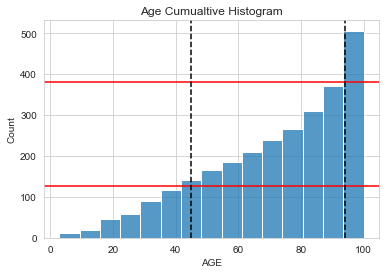

In [8]:
g = sns.histplot(data = df, x = "AGE", bins = 15, cumulative = True).set(title='Age Cumualtive Histogram');
plt.axhline(0.75*len(df.index), color='r', linestyle='-');
plt.axhline(0.25*len(df.index), color='r', linestyle='-');

#add also vertical line
plt.axvline(df.AGE.quantile(0.25), color = 'k', linestyle = '--');
plt.axvline(df.AGE.quantile(0.75), color = 'k', linestyle = '--');

6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

We'll try to look for interesting correlations between the data and the target variable:

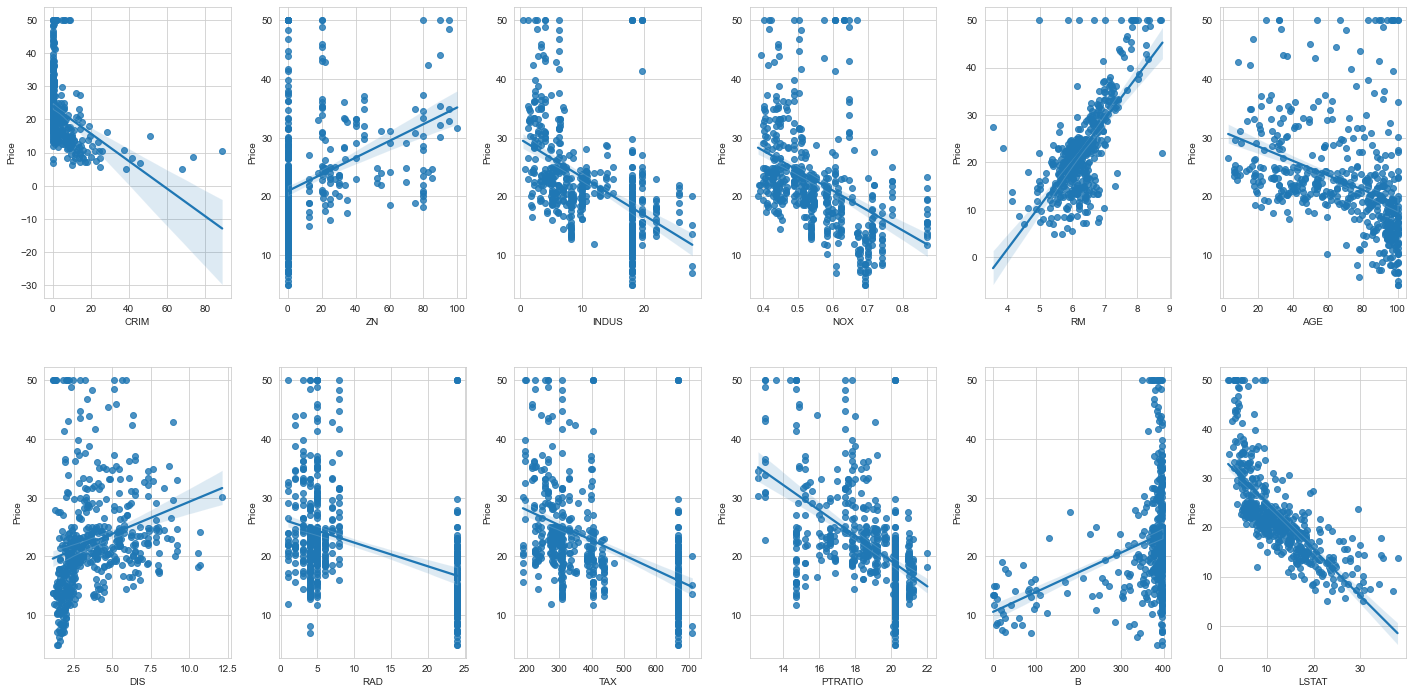

In [9]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

#Remove trivial columns
for i,k in enumerate(j for j in df.columns if j not in ['Price','CHAS']):
    sns.regplot(data = df, x = k, y = 'Price', ax=axs[i])
plt.tight_layout(pad=2, w_pad=1, h_pad=4)

Generally some behaviours are as expected:
* Price trends up with the number of rooms, the distance to eployment centers, and the proportion of lots over 25Ksqft.
* Price generally trends down with age, nox emissions, the % of industrial areas, the crime rate, the distnace to radial roads (not so strongly), the number of pupils per teacher.

We can say that some relations are unexpected (and thus quite interesting):
* The higher the tax rate, the lower the price - we would expect higher tax in higher priced regions.
* Distance - we would expect the price to go down when going further from employment centers. 
* Areas with zero crime can range in price from the minimum range to the maximum, but those with crime > 10 are exclusively low price.

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

we can parametrize all possible outcomes $m+n+k=12$. 
We can parametrize all probabilities with $nmk-1=63$ (-1 because the sum of the probabilitiesmust be 1, so we a constraint that decreases the degrees of freedom by 1). 

overall $n+m+k+nmk-1 = 75$

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Independent means $P(X=x,Y=y,Z=z)=P(X=x)P(Y=y)P(Z=z)$. We can treat the whole distribution as a construction of 3 distribution each fully described by $2k=8$ variables with the constraint on. 

It means we only need $n+m+k+n+m+k-1=23$ paramenters to describe the distribution 

The intuition behind the reduction is that the information about the independence adds nmk constraints with n+m+k unknown variables, so we reduce the degrees of freedom by $nmk-n-m-k=52$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

The constraints become: $P(X=x,Y=y,Z=z)=P(X=x|Z=z)P(Y=y|Z=z)P(Z=z)$

We have k(n+m) constraints with k+m+n variables which means we loost $k(m+n)-k-m-n=32$ degrees of freedom compared to 2.A. 

We need for each outcome of Z m+n parameters to descrive the independt outcomes of X and Y. 

Overall $n+m+k + k(n+m) - 1 = 43$




#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

We will take W={0:the sign of V and U is identical,1:otherwise}

We need to prove that for our choice of W, then the next equations hold:

1) $P(U,V|W)\ne P(U|W)P(V|W)$ 

2) $P(U,V)=P(U)P(V)$

equation 2 holds because: $P(U,V)=\int{norm(x)norm(y)dxdy}\int{norm(x)dx}\int{norm(y)dy}==P(U)P(V)$ 
where $norm(u)\equiv \int_udu'\frac{1}{\sqrt{2\pi}}\exp{-\frac{u'}{2}}$ (here u is some range and u' is the elements in the range)

Lets proove for W=1

$P(U|W=1) = P(U>0|V>0) + P(U<0|V<0) = \frac{P(U>0)P(V>0)}{P(V>0)} + \frac{P(U<0)P(V<0)}{P(V<0)} = P(U>0) + P(U<0) = P(U)$ (here the U<0 means the porbability of the negative parts of the considered range, and V>0 means the probability of positive V altogether)
P(U>0|V>0). Symetrically it would all work for V as well and for W=0.  

Which means that $P(U|W)P(V|W) = P(U)P(V)$  

$P(U,V|W=1) = P(U>0,V>0) + P(U<0,V<0) = P(U>0)P(V>0) + P(U<0)P(V<0) = P(V)P(U) - P(U>0)P(V<0) - P(U<0)P(V>0) \n P(V)P(U) = P(U|W)P(V|W)$



### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.
##### Method 1: Graphic
We will plot the data density distribution along with the 3 underlying PDFs. We will attempt to graphically match the two by tweaking the parameters until a satisfactory result is achieved. Finally we will plot the resulting gaussian mix.

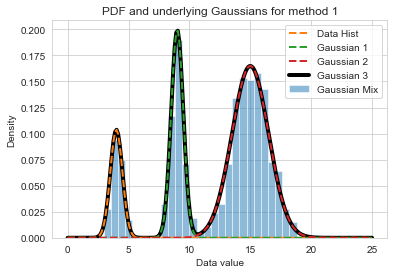

The resulting weights are: [0.13 0.25 0.62]  and mu: [ 4.  9. 15.]


In [10]:
#Import data and plot
GMD_df = pd.read_csv('GMD.csv', header=None, index_col =[0], names = ['Data'])
plt.hist(GMD_df, 30, density=True, alpha=0.5)

#manually tweak the parameters
w1 = np.array([0.375, 0.25, 0.62])
w1[0] = 1.0-w1[1]-w1[2] #enforce weight size
mu1 = np.array([4.0, 9.0, 15.0])
sigma1 = [0.5, 0.5, 1.5]

#plot resulting weighted PDFs
data_range = np.linspace(0,25,200)
GMD1 = np.zeros((200,))
for i in range(3):
    gaussian_i = w1[i]*stats.norm.pdf(data_range, loc = mu1[i], scale = sigma1[i])
    plt.plot(data_range, gaussian_i, '--', linewidth = 2, zorder = 4);
    GMD1 += gaussian_i

#plot resulting gaussian mixture
plt.plot(data_range, GMD1,'k', linewidth = 4, zorder = 2);
plt.legend(['Data Hist','Gaussian 1','Gaussian 2','Gaussian 3','Gaussian Mix']);
plt.title('PDF and underlying Gaussians for method 1')
plt.xlabel('Data value')
plt.ylabel('Density')
plt.show();

print('The resulting weights are:', w1, ' and mu:', mu1)

Using Method 1 we can estimate $\mu_3 = 15, w_1 = 0.13, w_3 = 0.62$.

##### Method 2: Analytic
We have to find $w_1, w_3$ and $\mu_3$. First, lets recall that all weights should sum to one:

$\Sigma w_i = w_1 + 0.25 + w_3 = 1 \rightarrow w_1 = 0.75-w_3$.

Next we can compute the variance and mean of the data:

In [11]:
print('Variance: ', round(GMD_df.Data.var(), 3), 'Mean: ', round(GMD_df.Data.mean(), 3))

Variance:  17.591 Mean:  12.199


Comparing the mean with the empirical one,

$\mu = \Sigma \mu_i k_i = 4w_1+9\times0.25+\mu_3 w_3 = 12.199 \rightarrow \mu_3 = \frac{6.949}{w_3}+4$

We have seen in class that the variance of the gaussian mixture relates to the variance of the underlying mixtures by:

$Var(GMD) = \Sigma_iw_iE((X_i-\mu_i)^2) + \Sigma_iw_i(\mu_i-\mu)^2 = \Sigma_iw_i\sigma_i^2+\Sigma_iw_i(\mu_i-\mu)^2=$
$=  w_1\times0.5^2+0.25\times0.5^2+w_3\times1.5^2+w_1\times(4-12.199)^2+0.25\times(9-12.199)^2+w_3\times(\mu_3-12.199)^2$

Plugging the computed variance, $\mu_3$ and $w_1$:

$17.591 = 67.47(0.75-w_3) + w_3(\frac{6.949}{w_3}+4-12.199)^2+2.25w_3+2.62$

Solving we recieve:
    
$\mu3 = 15.08, w_3 = 0.626, w_1 = 0.123$.



##### Method 3: EM
We cannot utilize the EM algorithm in the sklearn.mixture library since it does not force $\mu, \sigma$ or $w$ to the requested values. Therefore we will implement the EM algorithm in such a way that we update only those variables for which we have no assumption.

* The weigts will be udpated so that: $w = [w_1, w_2, w_3], \Sigma(w_i) = 1$ by adjusting the relative weights of $w_1$ and $w_3$ while holding $w_2$ constant.

* The variance is given and constant.

* Only $\mu_3$ is updated between iterations.


In [12]:
#Initial guess + assumptions:
mu2 = np.array([4.0, 9.0, 10.0])
sigma2 = np.array([0.5, 0.5, 1.5])
w2 = np.array([0.65, 0.25, 0.1])
k = 3

#Initialize the convergance parameters
max_itr = 100
tol = 0.00001

#Initialize EM parameters
log_likelihood = np.array([float('-inf')])
N = len(GMD_df)
r = np.zeros((N, k))

for itr in range(max_itr):
    #Compute the responsbillities for each gaussian

    for i in range (N):
        for kk in range (k):
            r[i,kk] = (w2[kk] * stats.norm.pdf(GMD_df.Data[i], mu2[kk], sigma2[kk]))
    
    #Divide by the sum of each row
    r = r/r.sum(axis=1)[:,None]
    
    #Update the weights, and ensure that the added weights have a sum of 0.75
    w2[[0,2]] = (r.sum(axis = 0)/N)[[0,2]]
    w2[[0,2]] = 0.75 * w2[[0,2]] / w2[[0,2]].sum(axis = 0)
    
    #Update the mean for w_3
    mu2[2] = (1/(w2[2]*N))*np.multiply(r[:,2], GMD_df.Data).sum()
    
    #Compute the log-likelihood
    log_likelihood = np.append(log_likelihood, [[0]])
    for kk in range (k):
        log_likelihood[itr+1] += np.log((w2*stats.norm.pdf(GMD_df.Data[i], mu2[kk], sigma2[kk])).sum())
    
    #Check for convergance
    if(abs((log_likelihood[itr+1]-log_likelihood[itr])/log_likelihood[itr]) < tol):
        print('Converged with w= ',np.around(w2,3),', mu = ', np.around(mu2,3), 'after',itr+1,'itr.')
        break

Converged with w=  [0.125 0.25  0.625] , mu =  [ 4.     9.    15.105] after 4 itr.


Using this approach we can estimate $\mu_3 = 15.105, w_1 = 0.125, w_3 = 0.625$ which is similar to the analytic approach.

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

The PDF will be the weighted sum of the underlying PDF functions. We will plot the PDF within the limits of $\mu-3\sigma$ and $\mu+3\sigma$ which is the usual analysis range for a gaussian (or gaussian-like in this case) function.

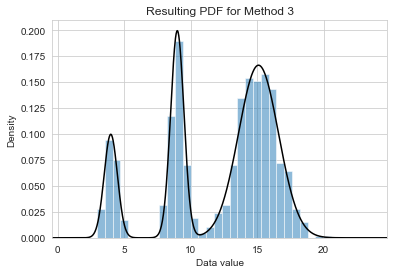

In [13]:
#Plot the Data histogram
plt.hist(GMD_df, 30, density=True, alpha=0.5)

#Compute the range
data_range = np.linspace(GMD_df.Data.mean()-3*GMD_df.Data.std(), GMD_df.Data.mean()+3*GMD_df.Data.std(),1000)

#Plot the PDF as a sum of PDFs over the range
draw2 = np.zeros(len(data_range),)
for i in range(len(w2)):
    draw2 += w2[i]*stats.norm.pdf(data_range, loc = mu2[i], scale = sigma2[i])
    
plt.plot(data_range, draw2, '-k')

#Change to range of mu +- 3sigma
plt.xlim([min(data_range), max(data_range)])
plt.title('Resulting PDF for Method 3')
plt.xlabel('Data value')
plt.ylabel('Density')
plt.show()

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

* Using method 1 (manual \ graphic) will be possible but very inaccurate and tedious without further information on the 4th gaussian.
* Using method 2 (analytic computation) will not be possible. Increasing to k = 4 adds three more parameters to be estimated ($\mu_4, w_4, \sigma_4$) and with no addtional information \ equations it will not be possible to estimate them.
* Using method 3 (EM) with k = 4 is possible.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

###### Approach 1:
Suppose we want to generate N values into an empty array.
1. Create 3 normal distributions with the parameters $\mu_i, \sigma_i$.
2. Draw a random integer $n$ with uniform probability between 1..3.
3. If $n = 1$, draw from distribution $i = 1$, if $n = 2$ from 2, etc. This is because the distributions all have identical weights.
4. Add the resulting value to array of results.
5. Repeat 2-4 N times.

##### Approach 2:
Suppose we require N samples, and $N % 3 = 0$.
1. Create 3 normal distributions with the parameters $\mu_i, \sigma_i$.
2. Draw $\frac{N}{3}$ results from distribution 1.
3. Repeat 2 for $i = 2,3$ while drawing $\frac{N}{3}$ from each distribution.

The resulting vector will have N samples equally weighted between distributions.
#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc).


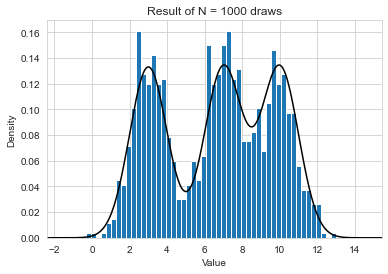

In [14]:
#plug in parameters. Each row (mu, sigma) is a gaussian
norm_params = [[3, 1], [7, 1], [10, 1]]
w = np.array([1/3, 1/3, 1/3])
N = 1000

#set normal distributions
np.random.seed(2)
mixture_idx = np.random.choice(3, size = N, p = w)
draw2 = np.fromiter((stats.norm.rvs(*(norm_params[i])) for i in mixture_idx),dtype=np.float64)

#Compute the range
data_range = np.linspace(draw2.mean()-3*draw2.std(), draw2.mean()+3*draw2.std(),N)

#Plot the PDF as a sum of PDFs over the range
draw3 = np.zeros(N,)
for i in range(len(w)):
    draw3 += w[i]*stats.norm.pdf(data_range, loc = norm_params[i][0], scale = norm_params[i][1])

#draw histogram of result
plt.hist(draw2, density=True, bins=50);

#draw also the theoretical PDF
plt.plot(data_range, draw3, '-k')
    
#Change to range of mu +- 3sigma
plt.xlim([min(data_range), max(data_range)])
plt.title('Result of N = 1000 draws')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

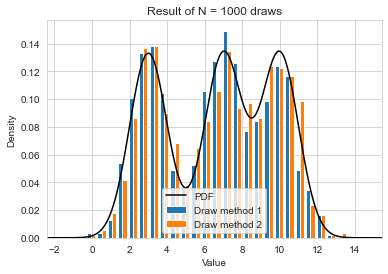

In [15]:
#vector of draw indices
mixture_idx = np.array([0]*int(N/3)+[1]*int(N/3)+[2]*int(N/3+1))
draw4 = np.fromiter((stats.norm.rvs(*(norm_params[i])) for i in mixture_idx),dtype=np.float64)

#draw all
draw5 = np.stack((draw2, draw4),axis=1)
plt.hist(draw5, 25, density=True)
plt.plot(data_range, draw3, '-k')

#Change to range of mu +- 3sigma
plt.xlim([min(data_range), max(data_range)])
plt.title('Result of N = 1000 draws')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(['PDF','Draw method 1','Draw method 2'])
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

In [16]:
from scipy import stats # using this librarys implementation of the normal distribution

#### 4.A
What percent of people earn less than 50,000 RCU?

In [17]:
distribution = stats.norm(loc=75000,scale=37500)

fraction less than X is exactly the CDF, multiplying by 100 to get percents

In [18]:
distribution.cdf(50_000) * 100 

25.24925375469229

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

using the CDF to retrieve the integral in the range 45k-65k RCU:

In [19]:
(distribution.cdf(65_000) - distribution.cdf(45_000))*100  

18.30075118806284

#### 4.C
What percent of people earn more than 85,000 RCU?

using 1 - CDF to retrieve the inegration from 85k RCU to infinity:

In [20]:
(1-distribution.cdf(85_000)) * 100 

39.48629104640251

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [21]:
(1-distribution.cdf(140_000)) * 1000

41.51821968877911

The calculation shows that there should be 41.5 people with earnings over 140k RCU, but because people count should be a natural number, we would expect the actual amount to be some natural number in the the vicinity of 41.5 (otherwise the salaries will not be approximately normally distributed)

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [22]:
import math

In [23]:
E_X_i=lambda i,N:N/(N-i)
E_T_N = lambda N:sum([E_X_i(i,N) for i in range(N)])

In [24]:
E_T_N(200) # exact value 

1175.6061896242886

In [25]:
200*math.log(200) # estimation from lectures (nH(n)~nlog(n), where H is the harmoinc sum up to n)

1059.6634733096073

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [26]:
V_X_i=lambda i,N:(1-(N-i)/N)/((N-i)/N)**2
V_T_N=lambda N:sum([V_X_i(i,N) for i in range(N)])

In [27]:
V_T_N(500) # exact value 

407337.60466372827

In [28]:
500**2*math.pi**2/6 - 500*math.log(500) # estimation from lectures (n^2*pi^2/6 - nH(n))

408126.21266284544

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [29]:

def geometric(p, k):
    """
    probability for k coin tosses in a geometric distribution with coin p (success rate)
    """
    if k == 0:
        return 0
    return p ** (k - 1) * (1 - p)


assert geometric(0.5, 0) == 0
assert geometric(0.5, 1) == 0.5
assert geometric(0.3, 2) == 0.3*0.7


def geometric_cdf(p, k):
    """
    probability for k coin tosses in a geometric distribution with coin p (success rate)
    """
    if p==0: # edge case treatment
        return int(k==1)
    return (1 - p)*(1-p**k)/p  # p(q + q^2 +...+q^k) = p(1-q^k)/q


assert geometric_cdf(0.5, 10) == sum([geometric(0.5, i) for i in range(11)])


def coupon(N, k, N_total=None):
    """
    probability to have at least k coupons before collecting N variations out of N_total
    N - coupon types left to collect
    k - coupons left to collect (aka try amount)
    N_total - total coupon amount

    Note: implementation from the presentation in lecture 3 slide 21
    Note2: this method has complexity O(k^N)
    """
    if N_total is None:  # if not defined, we assume N is the total coupon amount
        N_total = N
    # stopping conditions
    if k < N or k == 0:  # not possible to achieve cases
        return 0
    if N == 1: # completing the last coupon
        return geometric(1 - 1/N_total, k) # if we want P(T_N=k) we can change geometric_cdf with geometric
    # convolution on N-1
    # (sum over probabilities for collecting N-1 coupons with some k' and then getting
    # the final coupon with k-k')
    prob_new = 1 - N / N_total  # probability to get a new coupon
    conv_results = []
    for i in range(1, k):
        conv_part = geometric(prob_new, k - i) * coupon(N - 1, i, N_total)
        conv_results.append(conv_part)
    result = sum(conv_results)
    return result

assert coupon(2,2)==0.5
assert coupon(2,3)==0.25


def coupon_DP(N, k, N_total=None):
    """
    Same as coupon method but with dynamic programming implementation.
    Note: This method has complexity O(Nk^2) and returns a matrix with all the results for drawing.  
    :param N:
    :param k:
    :param N_total:
    :return: A matrix size NxK - with the i,j index meaning: 
    "probability to have at least (j+1) coupons before collecting (i+1) out of N coupons".  
    """
    if N_total is None:
        N_total = N
    if k==0:
        return 0
    M = [[0]*k for _ in range(N)] # N rows, k columns (starting from 1)
    M[0][0]=1
    for n in range(1,N):
        prob_new = 1 - n / N_total
        for j in range(k):
            if j<n: # k<N case
                continue
            for i in range(j):
                M[n][j] = M[n][j] + geometric(prob_new, j - i) * M[n - 1][i]
    return M


assert coupon_DP(2,2)[-1][-1] == 0.5
assert coupon_DP(2,5)[-1][-1] == coupon(2,5)


#### Sanity check - comparison with lecture results

Checking the result for N=100 k=[718,818,918] and comparing them to the ones presented in the lecture

In [30]:
a=np.array(coupon_DP(100,1000)) 

In [31]:
1-a[-1,:718].sum() # should be 0.12

0.07103111931541306

In [32]:
1-a[-1,:818].sum() # should be 0.05

0.026563073604745857

In [33]:
1-a[-1,:918].sum() # should be 0.02

0.009799022963059123

The numbers are not the same as those presented in the lecture (factor ~2 differnce)... not sure why

#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$

Using the method coupon_DP from above to generate the matrix where i,j location has the probability to get i out of the N coupons with j draws. 
Instead of taking the sum over the final row we will sum the 15th row. 

In [34]:
S_30 = np.array(coupon_DP(30,100))

In [35]:
1-S_30[14,:60].sum()

0.8897345918795422